<a href="https://colab.research.google.com/github/farshadabdulazeez/deep-learning-basics/blob/main/data_augmentation_on_a_single_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**


In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image as IPImage, display
import glob
import os

**Load and preprocess the image**


In [4]:
# Specify the path to the input image and the target size for resizing
image_path = "cat.jpg"
target_size = (200, 200)

**Load the image and resize it to the target size**


In [5]:
img = image.load_img(image_path, target_size=target_size)
print(f"Image type after loading: {type(img)}")

Image type after loading: <class 'PIL.Image.Image'>


**Convert the image to a NumPy array for further processing**


In [6]:
img_array = image.img_to_array(img)
print(f"Image type after conversion to array: {type(img_array)}")
print(f"Image shape: {img_array.shape}")

Image type after conversion to array: <class 'numpy.ndarray'>
Image shape: (200, 200, 3)


**Reshape the image array to add a batch dimension**


In [7]:
input_batch = img_array.reshape(1, *target_size, 3)
print(f"Input batch shape: {input_batch.shape}")

Input batch shape: (1, 200, 200, 3)


**Define the ImageDataGenerator for data augmentation**


In [8]:
# Specify a comprehensive set of augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,             # Rotate images within 40 degrees for more variation
    shear_range=0.3,               # Shear images up to 0.3 radians
    zoom_range=[0.8, 1.2],         # Randomly zoom in (80%) or out (120%)
    horizontal_flip=True,          # Randomly flip images horizontally
    vertical_flip=True,            # Randomly flip images vertically (useful for non-asymmetrical images)
    width_shift_range=0.3,         # Shift image width by up to 30%
    height_shift_range=0.3,        # Shift image height by up to 30%
    brightness_range=[0.8, 1.2],   # Randomly adjust image brightness
    channel_shift_range=50.0,      # Randomly shift the color channels
    fill_mode="nearest"            # Fill empty areas after transformations with the nearest pixel
)

**Directory to save augmented images**


In [9]:
augmented_images_dir = "/content/sample_data/aug"
os.makedirs(augmented_images_dir, exist_ok=True)  # Ensure the directory exists


**Generate and save augmented images**


In [10]:
# The generator will output augmented images based on the input batch
print("Generating augmented images...")
num_augmented_images = 10  # Number of augmented images to generate
counter = 0

for output in datagen.flow(input_batch, batch_size=1, save_to_dir=augmented_images_dir, save_format="png"):
    counter += 1
    if counter >= num_augmented_images:
        break

print(f"Generated {counter} augmented images in: {augmented_images_dir}")

Generating augmented images...
Generated 10 augmented images in: /content/sample_data/aug


**Display the augmented images**


Displaying augmented images...


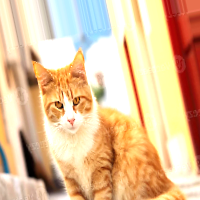

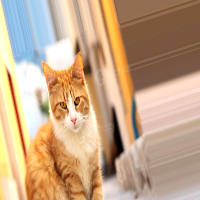

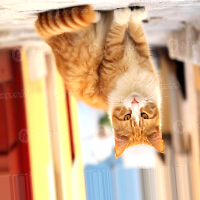

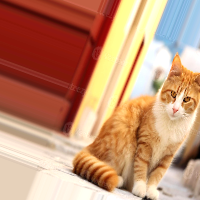

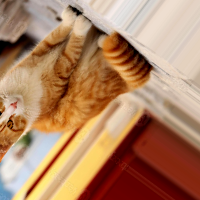

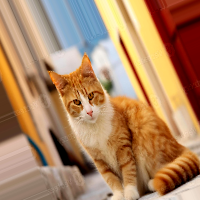

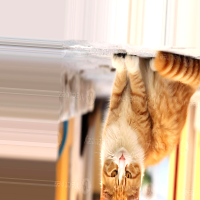

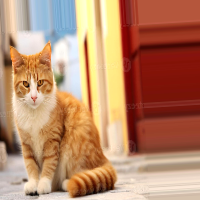

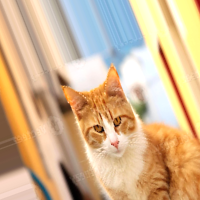

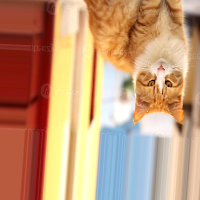

In [11]:
print("Displaying augmented images...")
for filename in glob.glob(os.path.join(augmented_images_dir, "*.png")):
    display(IPImage(filename=filename))